In [4]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [8]:
# importing dataset 
df=pd.read_csv("https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk",encoding='latin-1')

In [9]:
# checking the dimensions of dataset
df.shape

(3047, 34)

In [10]:
# Looking at the first five rows
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [12]:
#finding the total number ofnull values in a column
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [13]:
#dropping columns having large number of null 
df=df.drop(["PctSomeCol18_24", "PctPrivateCoverageAlone"],axis=1)

In [14]:
#filling the null values with mean
df['PctEmployed16_Over']=df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean())

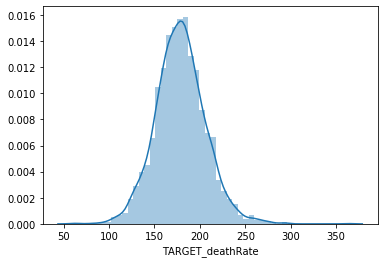

In [16]:
import seaborn as sns
sns.distplot(df['TARGET_deathRate'])

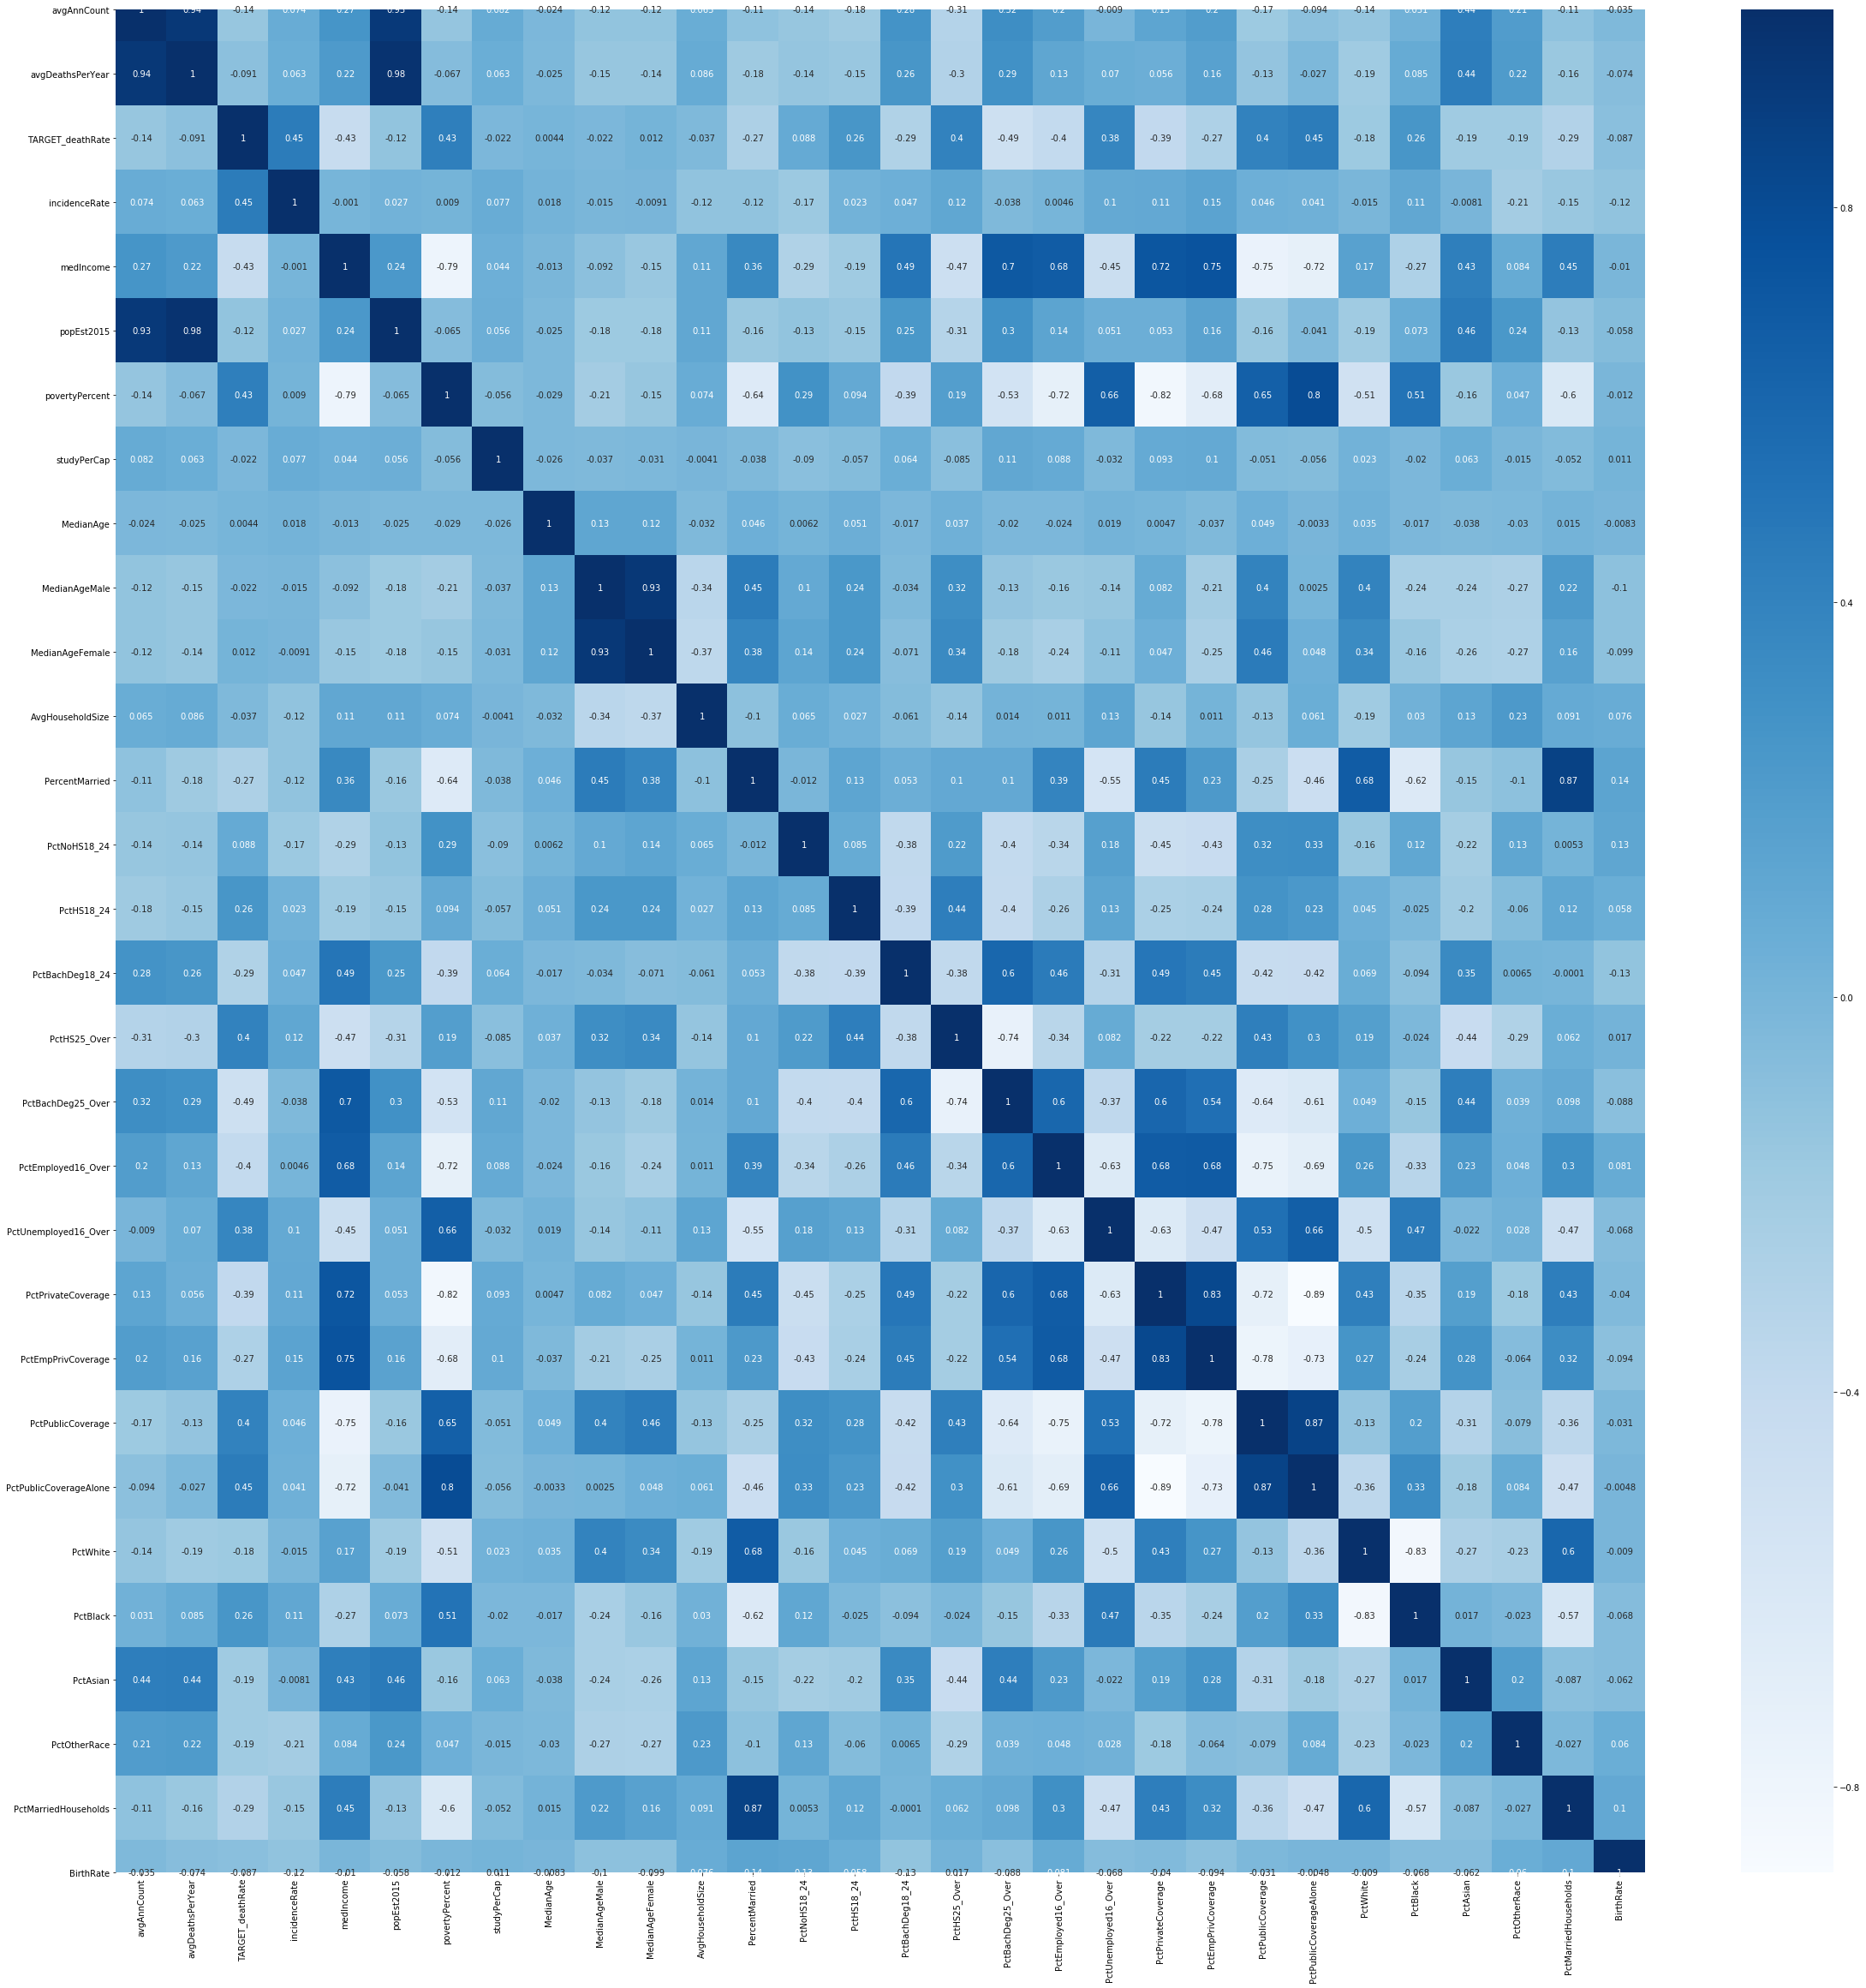

In [18]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), annot =True, cmap="Blues")
plt.show()

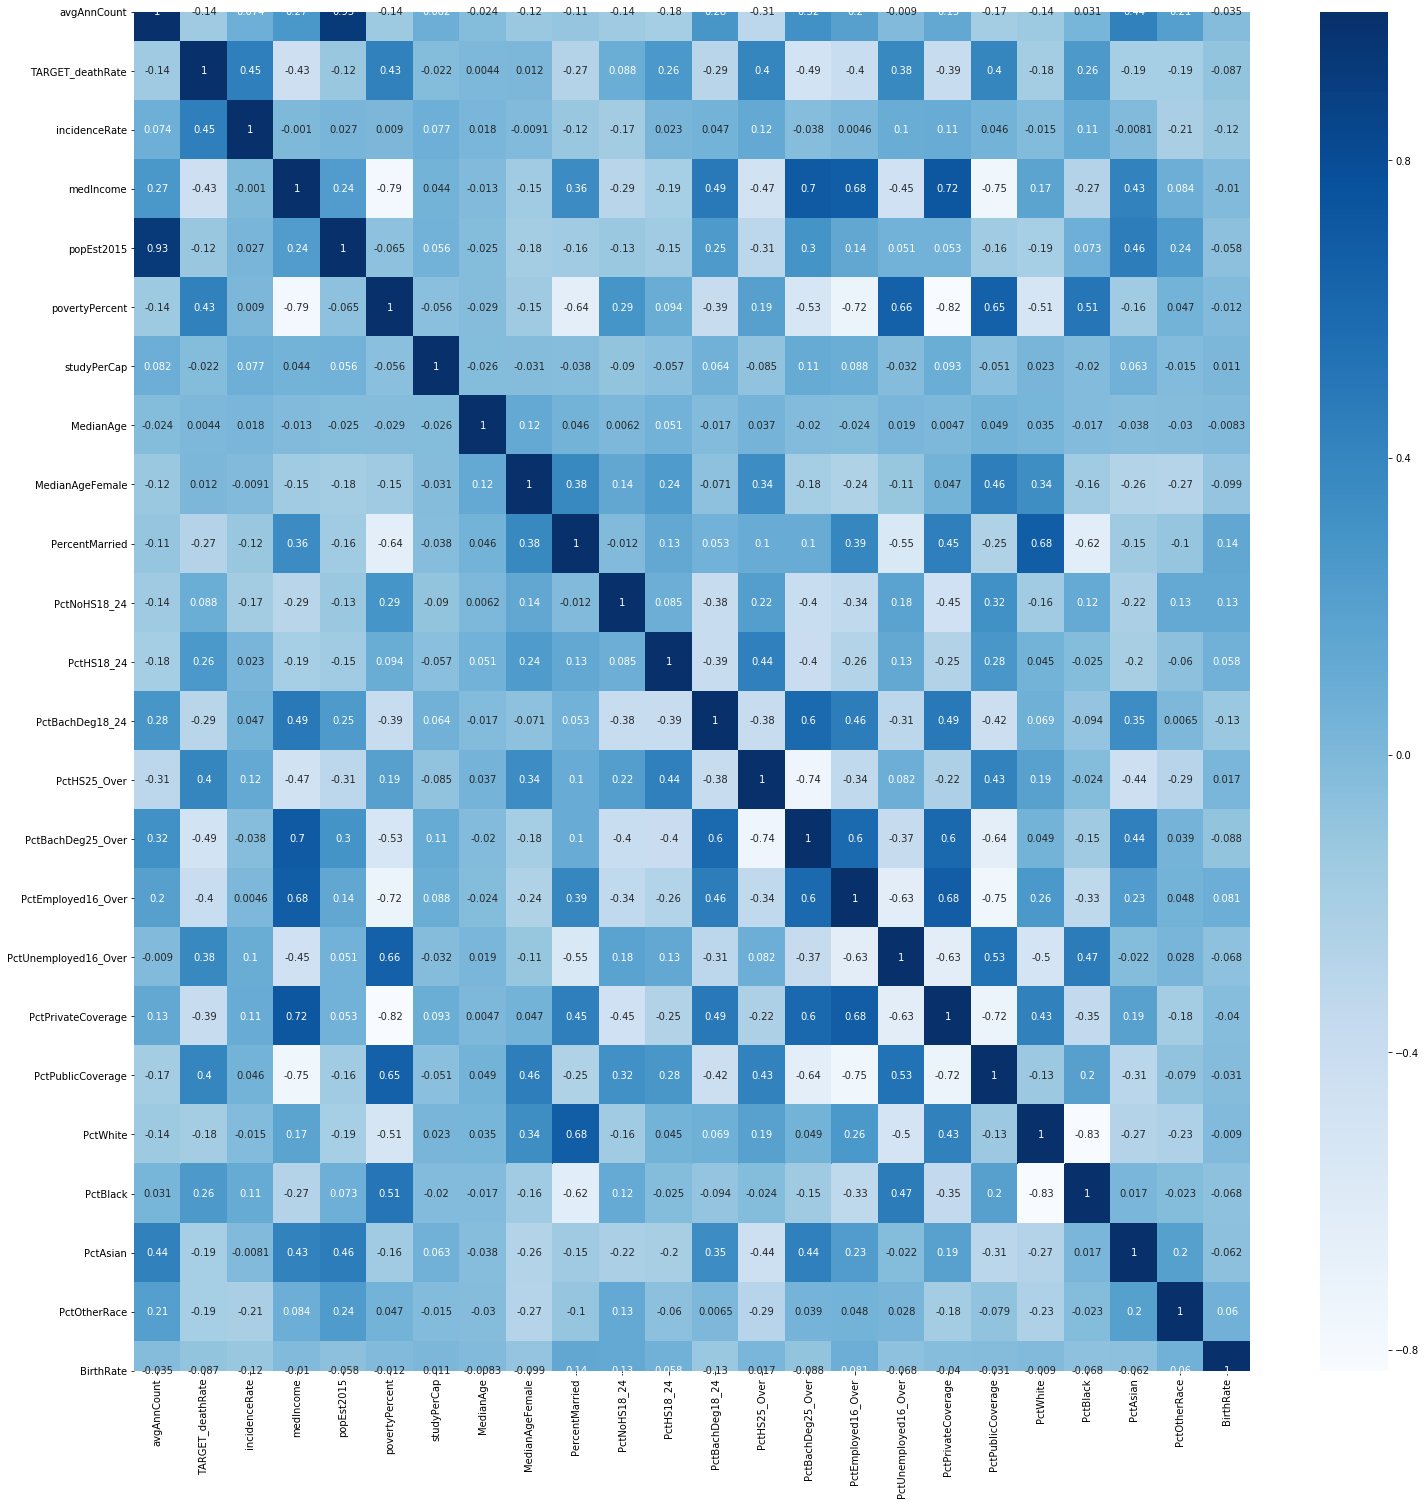

In [19]:
new_feature = ['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
        'MedianAgeFemale',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage',
       'PctPublicCoverage',  'PctWhite', 'PctBlack',
       'PctAsian', 'PctOtherRace', 'BirthRate']
plt.figure(figsize=(25,25))
sns.heatmap(df[new_feature].corr(), annot=True, cmap='Blues')

In [20]:
df=df.drop(["PctEmployed16_Over", "Geography" ],axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 30 columns):
avgAnnCount               3047 non-null float64
avgDeathsPerYear          3047 non-null int64
TARGET_deathRate          3047 non-null float64
incidenceRate             3047 non-null float64
medIncome                 3047 non-null int64
popEst2015                3047 non-null int64
povertyPercent            3047 non-null float64
studyPerCap               3047 non-null float64
binnedInc                 3047 non-null object
MedianAge                 3047 non-null float64
MedianAgeMale             3047 non-null float64
MedianAgeFemale           3047 non-null float64
AvgHouseholdSize          3047 non-null float64
PercentMarried            3047 non-null float64
PctNoHS18_24              3047 non-null float64
PctHS18_24                3047 non-null float64
PctBachDeg18_24           3047 non-null float64
PctHS25_Over              3047 non-null float64
PctBachDeg25_Over         3047 non-n

In [22]:
#converting int type columns to float type
df=df.astype({'popEst2015': 'float64','medIncome': 'float64' , 'avgDeathsPerYear': 'float64'})
df.dtypes

avgAnnCount               float64
avgDeathsPerYear          float64
TARGET_deathRate          float64
incidenceRate             float64
medIncome                 float64
popEst2015                float64
povertyPercent            float64
studyPerCap               float64
binnedInc                  object
MedianAge                 float64
MedianAgeMale             float64
MedianAgeFemale           float64
AvgHouseholdSize          float64
PercentMarried            float64
PctNoHS18_24              float64
PctHS18_24                float64
PctBachDeg18_24           float64
PctHS25_Over              float64
PctBachDeg25_Over         float64
PctUnemployed16_Over      float64
PctPrivateCoverage        float64
PctEmpPrivCoverage        float64
PctPublicCoverage         float64
PctPublicCoverageAlone    float64
PctWhite                  float64
PctBlack                  float64
PctAsian                  float64
PctOtherRace              float64
PctMarriedHouseholds      float64
BirthRate     

In [23]:
# Getting dummy variables 
df =pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 39 columns):
avgAnnCount                     3047 non-null float64
avgDeathsPerYear                3047 non-null float64
TARGET_deathRate                3047 non-null float64
incidenceRate                   3047 non-null float64
medIncome                       3047 non-null float64
popEst2015                      3047 non-null float64
povertyPercent                  3047 non-null float64
studyPerCap                     3047 non-null float64
MedianAge                       3047 non-null float64
MedianAgeMale                   3047 non-null float64
MedianAgeFemale                 3047 non-null float64
AvgHouseholdSize                3047 non-null float64
PercentMarried                  3047 non-null float64
PctNoHS18_24                    3047 non-null float64
PctHS18_24                      3047 non-null float64
PctBachDeg18_24                 3047 non-null float64
PctHS25_Over                 

In [24]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
changecolumns = ['avgAnnCount' , 'avgDeathsPerYear' , 'TARGET_deathRate' , 'incidenceRate' , 'medIncome' ,'popEst2015' , 'povertyPercent' , 'studyPerCap' , 'MedianAge','MedianAgeMale' , 'MedianAgeFemale' , 'AvgHouseholdSize' , 'PercentMarried' , 'PctNoHS18_24' , 'PctHS18_24' , 'PctBachDeg18_24' , 'PctHS25_Over' , 'PctBachDeg25_Over' , 'PctUnemployed16_Over' , 'PctPrivateCoverage' , 'PctPublicCoverage' , 'PctPublicCoverageAlone' , 'PctWhite' , 'PctBlack' , 'PctAsian' , 'PctOtherRace' , 'PctMarriedHouseholds','BirthRate']
df[changecolumns] = scaler.fit_transform(df[changecolumns])
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]"
0,0.036467,0.033269,0.347080,0.286893,0.381164,0.025498,0.180995,0.051192,0.028253,0.342790,...,0,0,0,0,0,0,0,0,1,0
1,0.004378,0.004783,0.335203,0.209129,0.247459,0.004173,0.348416,0.002367,0.017783,0.231678,...,0,0,0,0,0,1,0,0,0,0
2,0.002517,0.003355,0.379413,0.147574,0.259314,0.001986,0.257919,0.004872,0.037726,0.510638,...,0,0,0,0,0,1,0,0,0,0
3,0.011037,0.014207,0.445727,0.227824,0.209748,0.007380,0.314480,0.035098,0.034070,0.468085,...,0,0,0,1,0,0,0,0,0,0
4,0.001337,0.001642,0.279446,0.147971,0.265207,0.000934,0.210407,0.000000,0.043211,0.600473,...,0,0,0,0,0,1,0,0,0,0


In [25]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [26]:
# splitting the train and test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# dividing data into x and y sets for training
x = df.drop(['TARGET_deathRate' , 'PctMarriedHouseholds' , 'popEst2015' , 'BirthRate' , 'PctBachDeg25_Over' , 'PctPublicCoverage' ,'PctBachDeg18_24', 'PctPrivateCoverage' , 'MedianAgeMale' ,  'medIncome' ,  'PctUnemployed16_Over' , 'avgDeathsPerYear' ,  'AvgHouseholdSize','PctWhite'   ] , axis =1)
y = df['TARGET_deathRate']

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x,y)

rfe = RFE(lm, 10)             
rfe = rfe.fit(x,y)

In [29]:
list(zip(x.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('incidenceRate', True, 1),
 ('povertyPercent', True, 1),
 ('studyPerCap', False, 9),
 ('MedianAge', False, 11),
 ('MedianAgeFemale', True, 1),
 ('PercentMarried', False, 4),
 ('PctNoHS18_24', False, 13),
 ('PctHS18_24', True, 1),
 ('PctHS25_Over', True, 1),
 ('PctEmpPrivCoverage', False, 14),
 ('PctPublicCoverageAlone', True, 1),
 ('PctBlack', True, 1),
 ('PctAsian', False, 15),
 ('PctOtherRace', True, 1),
 ('binnedInc_(34218.1, 37413.8]', False, 2),
 ('binnedInc_(37413.8, 40362.7]', False, 3),
 ('binnedInc_(40362.7, 42724.4]', False, 12),
 ('binnedInc_(42724.4, 45201]', False, 16),
 ('binnedInc_(45201, 48021.6]', False, 10),
 ('binnedInc_(48021.6, 51046.4]', False, 6),
 ('binnedInc_(51046.4, 54545.6]', False, 5),
 ('binnedInc_(54545.6, 61494.5]', False, 7),
 ('binnedInc_(61494.5, 125635]', False, 8),
 ('binnedInc_[22640, 34218.1]', True, 1)]

In [30]:
rfe_col = x.columns[rfe.support_]
rfe_col

Index(['avgAnnCount', 'incidenceRate', 'povertyPercent', 'MedianAgeFemale',
       'PctHS18_24', 'PctHS25_Over', 'PctPublicCoverageAlone', 'PctBlack',
       'PctOtherRace', 'binnedInc_[22640, 34218.1]'],
      dtype='object')

In [31]:
x.columns[~rfe.support_]

Index(['studyPerCap', 'MedianAge', 'PercentMarried', 'PctNoHS18_24',
       'PctEmpPrivCoverage', 'PctAsian', 'binnedInc_(34218.1, 37413.8]',
       'binnedInc_(37413.8, 40362.7]', 'binnedInc_(40362.7, 42724.4]',
       'binnedInc_(42724.4, 45201]', 'binnedInc_(45201, 48021.6]',
       'binnedInc_(48021.6, 51046.4]', 'binnedInc_(51046.4, 54545.6]',
       'binnedInc_(54545.6, 61494.5]', 'binnedInc_(61494.5, 125635]'],
      dtype='object')

In [32]:
X_train_rfe = x[rfe_col]

In [33]:
# importing library
import statsmodels.api as sm

In [34]:
# Running the model
lm = sm.OLS(y,X_train_rfe).fit()

In [36]:
# printing summary of model
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.099e+04
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:15:22   Log-Likelihood:                          3953.8
No. Observations:                3047   AIC:                                     -7888.
Df Residuals:                    3037   BIC:                                     -7827.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [37]:
# Dropping the column with high p-value
X_train_new = X_train_rfe.drop(["binnedInc_[22640, 34218.1]"], axis = 1)

In [38]:
# Running the model afer dropping column
lm = sm.OLS(y,X_train_new).fit()

In [39]:
# printing summary of model again
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:       TARGET_deathRate   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.221e+04
Date:                Fri, 21 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:16:35   Log-Likelihood:                          3953.3
No. Observations:                3047   AIC:                                     -7889.
Df Residuals:                    3038   BIC:                                     -7834.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [40]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,PctPublicCoverageAlone,27.79
5,PctHS25_Over,25.20
2,povertyPercent,20.15
4,PctHS18_24,19.22
3,MedianAgeFemale,15.94
1,incidenceRate,15.14
7,PctBlack,2.02
8,PctOtherRace,1.48
0,avgAnnCount,1.36


In [41]:
y_train_deathRate = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

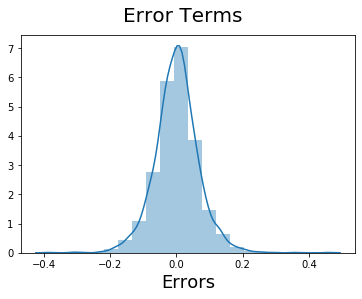

In [42]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_train_deathRate), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

In [43]:
# Dividing test data into X_test and y_test
y_test = df_test['TARGET_deathRate']
X_test = df_test.drop(['TARGET_deathRate' , 'PctMarriedHouseholds' , 'popEst2015' , 'BirthRate' , 'PctBachDeg25_Over' , 'PctPublicCoverage' ,'PctBachDeg18_24', 'PctPrivateCoverage' , 'MedianAgeMale' ,  'medIncome' ,  'PctUnemployed16_Over' , 'avgDeathsPerYear' ,  'AvgHouseholdSize','PctWhite'   ] , axis =1)


In [44]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

In [45]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

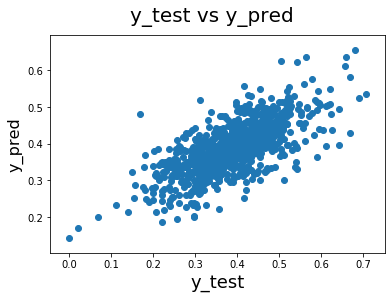

In [46]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 